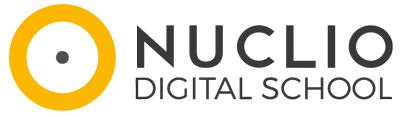

## **Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis. 


### 1) Import libraries

In [34]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2) Paths & directories

In [35]:
data_folder = 'data/'

annual_number_of_deaths_by_cause_path = data_folder + 'annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + 'death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + 'gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + 'global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + 'homicide_rate_unodc.csv'
life_expectancy_path = data_folder + 'life_expectancy.csv'
poverty_explorer_path = data_folder + 'poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + 'public_healthcare_spending_share_gdp.csv'


### 3) Quick data exploration 

#### 3.1 Dataset for deaths

In [36]:
# Dataset for deaths: Datos anuales sobre el número de muertes desglosadas por causa
print("Dataset for deaths ")
df_deaths = pd.read_csv(annual_number_of_deaths_by_cause_path)
print(f'Shape of the dataset for deaths: {df_deaths.shape}')

print(f'\nNumber of countries in the data: {df_deaths["Code"].nunique()}')
print(f'Number of years available in the data: {df_deaths["Year"].nunique()}')

display(df_deaths.head())


Dataset for deaths 
Shape of the dataset for deaths: (6840, 34)

Number of countries in the data: 205
Number of years available in the data: 30


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


#### 3.2 Dataset for suicides

In [37]:
# Dataset for suicides: Tasa de suicidios
print("Dataset for suicides ")
df_suicides = pd.read_csv(death_rate_from_suicides_gho_path)
print(f'Shape of the dataset for deaths: {df_suicides.shape}')

print(f'\nNumber of countries in the data: {df_suicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_suicides["Year"].nunique()}')

display(df_suicides.head())

Dataset for suicides 
Shape of the dataset for deaths: (3880, 4)

Number of countries in the data: 184
Number of years available in the data: 20


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77


#### 3.3 Dataset for GDP_per_capita

In [38]:
# Dataset for GDP_per_capita: PIB per cápita, a partir de la base de datos Penn World Table
print("Dataset for GDP")
df_gdp = pd.read_csv(gdp_per_capita_penn_world_table_path)
print(f'Shape of the dataset for GDP: {df_gdp.shape}')

print(f'\nNumber of countries in the data: {df_gdp["Code"].nunique()}')
print(f'Number of years available in the data: {df_gdp["Year"].nunique()}')

display(df_gdp.head())

Dataset for GDP
Shape of the dataset for GDP: (10108, 4)

Number of countries in the data: 182
Number of years available in the data: 70


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


#### 3.4 Dataset for vaccination

In [39]:
# Dataset for vaccination: global_vaccination_coverage
print("Dataset for vaccination")
df_vaccination = pd.read_csv(global_vaccination_coverage_path)
print(f'Shape of the dataset for vaccination: {df_vaccination.shape}')

print(f'\nNumber of countries in the data: {df_vaccination["Code"].nunique()}')
print(f'Number of years available in the data: {df_vaccination["Year"].nunique()}')

display(df_vaccination.head())


Dataset for vaccination
Shape of the dataset for vaccination: (7897, 14)

Number of countries in the data: 196
Number of years available in the data: 42


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


#### 3.5 Dataset for homicides

In [40]:
# Dataset for homicides: homicide_rate_unodc
print("Dataset for homicides")
df_homicides = pd.read_csv(homicide_rate_unodc_path)
print(f'Shape of the dataset for homicides: {df_homicides.shape}')

print(f'\nNumber of countries in the data: {df_homicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_homicides["Year"].nunique()}')

display(df_homicides.head())

Dataset for homicides
Shape of the dataset for homicides: (4204, 4)

Number of countries in the data: 201
Number of years available in the data: 32


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262


#### 3.6 Dataset for life_expectancy

In [41]:
# Dataset for life_expectancy: life_expectancy
print("Dataset for life expectancies")
df_life_expec = pd.read_csv(life_expectancy_path)
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')

#print(f'\nNumber of countries in the data: {df_life_expec["Code"].nunique()}')
#print(f'Number of years available in the data: {df_life_expec["Year"].nunique()}')

display(df_life_expec.head())

Dataset for life expectancies
Shape of the dataset for life expectancies: (20755, 4)


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


#### 3.7 Dataset for poverty

In [42]:
# Dataset for poverty: Datos sobre pobreza
print("Dataset for poverty")
df_poverty = pd.read_csv(poverty_explorer_path)
print(f'Shape of the dataset for poverty: {df_poverty.shape}')

print(f'\nNumber of countries in the data: {df_poverty["Country"].nunique()}')
print(f'Number of years available in the data: {df_poverty["Year"].nunique()}')


display(df_poverty.head())

Dataset for poverty
Shape of the dataset for poverty: (2602, 109)

Number of countries in the data: 192
Number of years available in the data: 60


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,1819,16944,281906,1516827,2395790,3126915,3164783,3166501,2.768821,7.548123,14.802514,87717,239127,468949,7.933157,6.972103,3.691232,13.164797,0.119104,0.270103,0.241293,3.863286,5.289347,6.378684,7.322042,8.379662,9.354903,10.823087,12.473869,14.899548,21.215572,4.687306,5.399629,6.228325,6.971433,8.039671,9.178580,10.682603,14.954244,17.344930,19.693201,0.414055,1.309217,2.915092,0.417050,0.604653,0.823818,36582.383,144588.90,386328.72,3.924362,38.960340,61.430424,18.363249,73.68916,18.084910,80.22638,28.927036,0.002253,29.463327,60.633118,0.098215,73.61356,1.609277,80.187584,13.850017,0.039244,3.896034,12.286085,0.394810,22.106749,0.660099,32.090553,1.981502,71.384155,9334079.0,38417544.0,6689.6580,69963064.0,186085.92,101614760.0,3005595.8,3.064805,4.196122,5.060310,5.808691,6.647718,7.421392,8.586125,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.137640,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.

#### 3.8 Dataset for public healthcare spending

In [43]:
# Dataset for public healthcare spending: Porcentaje del PIB destinado al gasto en sanidad pública
print("Dataset for public healthcare spending")
df_public_health_spend = pd.read_csv(public_healthcare_spending_share_gdp_path)
print(f'Shape of the dataset for poverty: {df_public_health_spend.shape}')

print(f'\nNumber of countries in the data: {df_public_health_spend["Code"].nunique()}')
print(f'Number of years available in the data: {df_public_health_spend["Year"].nunique()}')


display(df_public_health_spend.head())

Dataset for public healthcare spending
Shape of the dataset for poverty: (4014, 4)

Number of countries in the data: 191
Number of years available in the data: 20


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840


### 4) Funciones

In [44]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("Calculamos cuántas filas y columnas hay en el conjunto de datos")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("Mostramos las primeras dos filas del conjunto de datos")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("Calculamos cuántas filas y columnas hay en el conjunto de datos")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("Mostramos las primeras cinco filas del conjunto de datos")
        display(df.head())
        print('\n########################################################################################')

        print("Estas son las últimas cinco filas del conjunto de datos:")
        display(df.tail())
        print('\n########################################################################################')

        print("Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("Identificamos las columnas del conjunto de datos")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("Identificamos el tipo de datos de cada columna")
        print(df.dtypes)
        print('\n########################################################################################')

        print("Mostramos el total de columnas que hay de cada tipo de datos")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("Obtenemos información más completa sobre la estructura y el contenido del DataFrame")
        print(df.info())
        print('\n########################################################################################')

        print("Mostramos valores únicos tiene cada columna")
        print(df.nunique())
        print('\n########################################################################################')

        print("Estas son las estadísticas descriptivas básicas de todas las columnas:")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')

        print("Observamos los valores nulos en el conjunto de datos")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("Calculamos el porcentaje de valores nulos en cada columna")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')

In [45]:
def renombrar_columnas(df, mapeo_columnas):
    df = df.rename(columns=mapeo_columnas)
    return df

## 5) Analisis Exploratorio de datos

#### 5.1 DF DEATHS

In [ ]:
exploracion_inicial(df_deaths)

##### 5.1.1 Nulos: identificación y tratamiento

In [47]:
# Comprobamo a que paises corresponden los nulos de la columna Code
df_deaths.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                            0
African Region (WHO)                  30
Albania                                0
Algeria                                0
American Samoa                         0
Andorra                                0
Angola                                 0
Antigua and Barbuda                    0
Argentina                              0
Armenia                                0
Australia                              0
Austria                                0
Azerbaijan                             0
Bahamas                                0
Bahrain                                0
Bangladesh                             0
Barbados                               0
Belarus                                0
Belgium                                0
Belize                                 0
Benin                                  0
Bermuda                                0
Bhutan                                 0
Bolivia                                0
Bosnia an

Tras verificar a qué paises pertenecen los códigos nulos, vemos que pertenecen a grupos regionales, económicos o políticos.

La lista de los nulos en "Code" es: 

        African Region (WHO)
        East Asia & Pacific (WB) 
        Eastern Mediterranean Region (WHO)
        Europe & Central Asia (WB)      
        European Region (WHO) 
        G20
        Latin America & Caribbean (WB)
        Middle East & North Africa (WB)  
        North America (WB) 
        Northern Ireland 
        OECD Countries 
        Region of the Americas (WHO) 
        Scotland
        South Asia (WB) 
        South-East Asia Region (WHO)
        Sub-Saharan Africa (WB)
        Western Pacific Region (WHO)  
        World Bank High Income
        World Bank Low Income
        World Bank Lower Middle Income
        World Bank Upper Middle Income

Estos pueden ser agrupaciones o categorías supra-nacionales usadas por organizaciones internacionales como:

* Organización Mundial de la Salud (WHO).
* Banco Mundial (WB).
* Organización para la Cooperación y el Desarrollo Económico (OECD).
* G20 (Grupo de los 20 principales economías del mundo).
* Escocia/north irland: forma parte de Reino Unido, ya que no se trata de un país soberano independiente sino de nación constitutiva 

Así que hemos consensuado de que en caso de trabajar con estos, lo haremos directamente con el nombre que tienen en la columna "Entity". 

+++ Hemos decidido fijar el foco del estudio en un análisis país por país, por lo tanto, dejamos de lado estas regiones puesto que en ella se cuentan de nuevo.
Aun que a priori, las vayamos a dejar fuera de nuesto análisis, lo que haremos es cread dos DF: 

* df_deaths_paises: en este dejaremos solo los paises
* df_deaths_regiones: este nos servirá para almacenar dichas regiones sin los paises

In [48]:
# Creamos el DataFrame para almacenar los países
df_deaths_paises = df_deaths[df_deaths['Code'].notnull()]

In [49]:
# Comprobamos que no haya ningun nulo en la columna 'Code'
df_deaths_paises['Code'].isnull().sum()

0

In [50]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_deaths_regiones = df_deaths[df_deaths['Code'].isnull()]

In [51]:
# Comprobamos que hay el mismo numero de nulos que en el DF original (df_deaths)
df_deaths_regiones['Code'].isnull().sum()

690

In [52]:
# Contabilizamos las filas de los DataFrames para comprobar que no perdemos datos
len(df_deaths) == (len(df_deaths_paises) + len(df_deaths_regiones))

True

##### 5.1.2 Normalización del nombre de las columnas

In [53]:
# Creamos un diccionario con los nombres antiguos como "key" y los nuevos como "values"
mapeo_deaths = {
    "Entity": "entidad",
    "Code": "codigo",
    "Year": "año",
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)": "meningitis",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)": "alzheimer",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)": "parkinson",
    "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)": "deficiencias_nutricionales",
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)": "malaria",
    "Deaths - Drowning - Sex: Both - Age: All Ages (Number)": "ahogamiento",
    "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)": "violencia_interpersonal",
    "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)": "transtornos_maternos",
    "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)": "VIH_SIDA",
    "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)": "transtornos_drogas",
    "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)": "tuberculosis",
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)": "enf_cardiovasculares",
    "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)": "infecciones_respiratorias_leves",
    "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)": "transtornos_neonatales",
    "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)": "alcohol",
    "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)": "autolesiones",
    "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)": "fuerzas_naturaleza",
    "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)": "enfermedades_diarreicas",
    "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)": "temperatura_ambiental",
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)": "muertes",
    "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)": "conflictos-y_terrorismo",
    "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)": "diabetes_mellitus",
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)": "enfermedad_renal_cronica",
    "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)": "envenenamientos",
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)": "desnutricion_energético_proteica",
    "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)": "lesiones_accidentes_trafico",
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)": "enfermedades_respiratorias_crónicas",
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)": "cirrosis_enferemedades_higado",
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)": "enf_digestivas",
    "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)": "incendios_calor_sustancias_calientes",
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)": "hepatitis_aguda"
}

In [54]:
# Llamamos a la función de cambio de nombre y le pasamos el DataFrame a actualizar y el diccionario que debe tomar en cuenta
df_deaths_paises = renombrar_columnas(df_deaths_paises, mapeo_deaths) 
df_deaths_regiones = renombrar_columnas(df_deaths_regiones, mapeo_deaths) 

In [68]:
# Comrpobamos que el cambio se haya realizado correctamente
df_deaths_paises.columns

Index(['entidad', 'codigo', 'año', 'meningitis', 'alzheimer', 'parkinson',
       'deficiencias_nutricionales', 'malaria', 'ahogamiento',
       'violencia_interpersonal', 'transtornos_maternos', 'VIH_SIDA',
       'transtornos_drogas', 'tuberculosis', 'enf_cardiovasculares',
       'infecciones_respiratorias_leves', 'transtornos_neonatales', 'alcohol',
       'autolesiones', 'fuerzas_naturaleza', 'enfermedades_diarreicas',
       'temperatura_ambiental', 'muertes', 'conflictos-y_terrorismo',
       'diabetes_mellitus', 'enfermedad_renal_cronica', 'envenenamientos',
       'desnutricion_energético_proteica', 'lesiones_accidentes_trafico',
       'enfermedades_respiratorias_crónicas', 'cirrosis_enferemedades_higado',
       'enf_digestivas', 'incendios_calor_sustancias_calientes',
       'hepatitis_aguda'],
      dtype='object')

##### 5.1.3 Analisis Exploratorio DF PAISES

In [69]:
# Realizamos la exploración de datos del DataFrame "df_deaths_paises"
exploracion_inicial(df_deaths_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 6,150 filas y 34 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
6835,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,1355,29162,104,11214,16649,12974,9278,48,2235,16,5102,37,11161,13,3176,2108,381,2990,2373,2751,1956,4202,632,146
6836,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,1338,27141,110,10998,16937,13024,9065,49,2296,31,5002,37,11465,6,3259,2160,393,3027,2436,2788,1962,4264,648,146
6837,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,1312,24846,115,10762,17187,12961,8901,50,2338,251,4948,37,11744,5,3313,2196,398,2962,2473,2818,2007,4342,654,144
6838,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,1294,22106,121,10545,17460,12860,8697,51,2372,0,4745,37,12038,9,3381,2240,400,2890,2509,2849,2030,4377,657,139
6839,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,1294,20722,127,10465,17810,12897,8609,53,2403,660,4635,37,12353,11,3460,2292,405,2855,2554,2891,2065,4437,662,136



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
1385,Cuba,CUB,1995,320,2199,445,91,0,421,832,90,126,13,102,32756,4274,604,209,2364,2,649,6,16054,23,2357,944,43,68,2445,2328,1274,2974,174,34
1519,Denmark,DNK,2009,37,2264,474,91,0,38,58,3,39,224,35,15846,2401,125,864,729,0,332,18,17514,3,1422,959,12,60,364,4139,1109,2928,89,2
2450,Guatemala,GTM,2010,288,1181,277,2568,0,423,6989,430,708,78,445,11130,9698,3605,1582,918,177,3565,37,10103,0,4736,4091,230,2384,2039,1746,4105,6634,157,18
215,Antigua and Barbuda,ATG,1995,2,13,3,3,0,4,4,0,9,0,1,187,25,12,3,2,2,3,0,86,0,41,16,1,3,7,8,10,18,2,0
5392,Slovenia,SVN,2012,7,994,183,2,0,23,20,1,2,27,15,6961,593,26,187,455,1,5,18,5997,0,313,226,6,0,158,555,619,1129,12,1



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - meningitis
	 - alzheimer
	 - parkinson
	 - deficiencias_nutricionales
	 - malaria
	 - ahogamiento
	 - violencia_interpersonal
	 - transtornos_maternos
	 - VIH_SIDA
	 - transtornos_drogas
	 - tuberculosis
	 - enf_cardiovasculares
	 - infecciones_respiratorias_leves
	 - transtornos_neonatales
	 - alcohol
	 - autolesiones
	 - fuerzas_naturaleza
	 - enfermedades_diarreicas
	 - temperatura_ambiental
	 - muertes
	 - conflictos-y_terrorismo
	 - diabetes_mellitus
	 - enfermedad_renal_cronica
	 - envenenamientos
	 - desnutricion_energético_proteica
	 - lesiones_accidentes_trafico
	 - enfermedades_respiratorias_crónicas
	 - cirrosis_enferemedades_higado
	 - enf_digestivas
	 - incendios_calor_sustancias_calientes
	 - hepatitis_aguda

########################################################################################
Iden

,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
count,6150,6150,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0
unique,205,205,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
top,Afghanistan,AFG,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,30,30,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mean,,,2004.5,3423.639675,9683.673496,2335.548943,4486.367154,8242.927154,3351.127805,4151.457236,2513.731057,11831.072033,863.911707,14913.983089,145645.79626,27250.711707,25001.596911,1567.466992,7713.353333,486.102276,21544.736748,581.808618,74737.344715,1071.625528,10232.736748,9405.269268,846.067642,3913.897724,11807.082276,34024.413171,12191.752846,21351.725041,1172.139675,1231.042764
std,,,8.656145,25578.692671,74540.530288,17821.571447,35677.646036,61813.290367,25942.498643,30357.542437,19020.454835,91564.00099,6878.515628,114046.254367,1082683.279332,200526.756338,187616.47195,11738.165596,57874.525122,7662.896173,169123.979795,4509.865472,561681.574665,12181.872147,76773.396806,71089.056676,6350.366404,30949.767359,87385.076263,263984.687769,89573.954204,156857.1838,8613.047956,9890.803814
min,,,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,,,1997.0,16.0,91.25,27.0,9.0,0.0,34.25,41.0,5.0,11.0,3.0,35.25,2065.5,351.0,132.25,9.0,96.25,0.0,21.0,2.0,826.0,0.0,239.0,148.25,6.0,5.0,176.25,292.0,155.0,288.0,17.0,2.0
50%,,,2004.5,112.0,674.5,166.0,121.0,0.0,179.0,273.0,55.0,139.0,21.0,424.0,11902.5,2146.0,931.0,81.0,537.0,0.0,305.0,21.0,5657.5,0.0,1099.0,837.5,54.0,93.0,984.0,1713.0,1234.0,2205.0,127.0,15.0
75%,,,2012.0,886.75,2500.0,618.75,1201.75,426.75,707.0,885.75,750.75,1957.5,132.0,3024.5,43722.25,10374.0,7598.25,323.0,1909.5,12.0,4089.25,111.0,20554.25,24.0,3005.75,2989.25,262.0,1081.75,3534.25,5382.5,3614.0,6184.75,455.0,166.0



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                                 0
enfermedad_renal_cronica                0
fuerzas_naturaleza                      0
enfermedades_diarreicas                 0
temperatura_ambiental                   0
muertes                                 0
conflictos-y_terrorismo                 0
diabetes_mellitus                       0
envenenamientos                         0
codigo                                  0
desnutricion_energético_proteica        0
lesiones_accidentes_trafico             0
enfermedades_respiratorias_crónicas     0
cirrosis_enferemedades_higado           0
enf_digestivas                          0
incendios_calor_sustancias_calientes    0
autolesiones                            0
alcohol                                 0
transtornos_neonatales                  0
infecciones_respiratorias_leves         0
enf_cardiovascula

#### 5.5 DF Homicidios

In [ ]:
exploracion_inicial(df_homicides)

##### 5.5.1 Nulos: identificación y tratamiento

In [ ]:
# Identificamos a qué pais/región pertenecen los nulos
df_homicides.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                          0
Africa (UN)                         22
Albania                              0
Algeria                              0
American Samoa                       0
Americas (UN)                       22
Andorra                              0
Angola                               0
Anguilla                             0
Antigua and Barbuda                  0
Argentina                            0
Armenia                              0
Aruba                                0
Asia (UN)                           22
Australia                            0
Austria                              0
Azerbaijan                           0
Bahamas                              0
Bahrain                              0
Bangladesh                           0
Barbados                             0
Belarus                              0
Belgium                              0
Belize                               0
Bermuda                              0
Bhutan            

Tal y como ocurría con el dataset "df_deaths"m los nulos corresponden a grupos/agregaciones que usa la ONU para agrupar países de acuerdo a su ubicación continental o subcontinental. 

De modo que podemos afirmar lo siguiente: 

* No son paises individuales
* Duplican información puesto que paises que ya aparecen en nuestra tabla forman parte de esas regiones. 

Procedemos exactamente de la misma manera que en el primer dataset y procedemos a crear una tabla de regiones y otra de paises. 

In [59]:
# Creamos el DataFrame para almacenar los países
df_homicides_paises = df_homicides[df_homicides['Code'].notnull()]

In [60]:
# Verificamos que no hay ningún nulo en la columna ['codigo']
df_homicides_paises['Code'].isnull().sum()

0

In [61]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_homicides_regiones = df_homicides[df_homicides['Code'].isnull()]

In [62]:
# Verificamos que tenemos los 176 nulos en la columna ['codigo']
df_homicides_regiones['Code'].isnull().sum()

176

##### 5.5.2 Normalización del nombre de las columnas

In [71]:
# Creamos un diccionario con los nombres antiguos como "key" y los nuevos como "values"
mapeo_homicides = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Homicide rate per 100,000 population - Both sexes - All ages": "ratio_por_cien_mil"

}

In [72]:
df_homicides_paises = renombrar_columnas(df_homicides_paises, mapeo_homicides)
df_homicides_regiones = renombrar_columnas(df_homicides_regiones, mapeo_homicides)

In [73]:
df_homicides_paises.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_cien_mil'], dtype='object')

In [74]:
df_homicides_regiones.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_cien_mil'], dtype='object')

##### 5.5.3 Análisis exploratorio de df_homicides_paises

In [75]:
exploracion_inicial(df_homicides_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,028 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,ratio_por_cien_mil
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,ratio_por_cien_mil
4199,Zimbabwe,ZWE,2012,7.395217
4200,Zimbabwe,ZWE,2018,4.876369
4201,Zimbabwe,ZWE,2019,5.145035
4202,Zimbabwe,ZWE,2020,4.977770
4203,Zimbabwe,ZWE,2021,6.139985



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,ratio_por_cien_mil
1617,Guyana,GUY,2005,18.691368
2740,Nicaragua,NIC,2007,12.733052
3523,South Africa,ZAF,1996,57.028854
2028,Kenya,KEN,2004,3.448223
3154,Romania,ROU,2002,3.029529



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - ratio_por_cien_mil

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                object
codigo                 object
año                     int64
ratio_por_cien_mil    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 4028 entries, 0 to 4203
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtyp

,entidad,codigo,año,ratio_por_cien_mil
count,4028,4028,4028.0,4028.0
unique,201,201,,
top,Bulgaria,BGR,,
freq,32,32,,
mean,,,2006.430487,8.070061
std,,,8.762427,12.272516
min,,,1990.0,0.0
25%,,,1999.0,1.274714
50%,,,2007.0,3.179135
75%,,,2014.0,9.409311



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad               0
codigo                0
año                   0
ratio_por_cien_mil    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad               0.0
codigo                0.0
año                   0.0
ratio_por_cien_mil    0.0
dtype: float64

########################################################################################


#### 5.6 DF life_expectancy

In [76]:
exploracion_inicial(df_life_expec)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 20,755 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242
20754,Zimbabwe,ZWE,2021,59.2531



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
14208,Oceania,NaN,1993,74.0341
18297,Taiwan,TWN,1991,74.3462
18750,Tonga,TON,2008,70.1640
13264,New Zealand,NZL,1986,74.1165
15517,Saint Barthelemy,BLM,1951,55.0116



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Period life expectancy at birth - Sex: all - Age: 0

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                  object
Code                                                    object
Year                                                     int64
Period life expectancy at birth - Sex: all - Age: 0    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el conteni

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
count,20755,19061,20755.0,20755.0
unique,261,238,,
top,Sweden,SWE,,
freq,271,271,,
mean,,,1975.730234,61.617992
std,,,38.42323,12.917682
min,,,1543.0,11.9951
25%,,,1961.0,52.18585
50%,,,1981.0,64.06
75%,,,2001.0,71.82225



########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                   1694
Entity                                                    0
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                   8.16
Entity                                                 0.00
Year                                                   0.00
Period life expectancy at birth - Sex: all - Age: 0    0.00
dtype: float64

########################################################################################


##### 5.6.1 Nulos: identificación y tratamiento

In [98]:
df_life_expec.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                                                      0
Africa                                                          74
Albania                                                          0
Algeria                                                          0
American Samoa                                                   0
Americas                                                        78
Andorra                                                          0
Angola                                                           0
Anguilla                                                         0
Antigua and Barbuda                                              0
Argentina                                                        0
Armenia                                                          0
Aruba                                                            0
Asia                                                            76
Australia                                              

Siguiendo el mismo razonamiento que con los demás DataSets, procedemos a separar el DataFrame en dos (paises y regiones/continentes)

In [99]:
# Creamos el DataFrame de paises
df_life_expec_paises = df_life_expec[df_life_expec['Code'].notnull()]

In [100]:
# Comprobamos que no haya cogido nulos en la columna 'Code' 
df_life_expec_paises.isnull().sum()

Entity                                                 0
Code                                                   0
Year                                                   0
Period life expectancy at birth - Sex: all - Age: 0    0
dtype: int64

In [101]:
# Creamos el DataFrame de regiones
df_life_expec_regiones = df_life_expec[df_life_expec['Code'].isnull()]

In [102]:
# Comprobamos que haya cogido todos nulos en la columna 'Code' 
df_life_expec_regiones.isnull().sum()

Entity                                                    0
Code                                                   1694
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

In [103]:
# Comprobamos el tamaño del df original
len(df_life_expec)

20755

In [104]:
# Comprobamos el tamaño del df de paises
len(df_life_expec_paises)

19061

In [105]:
# Comprobamos el tamaño del df de regiones
len(df_life_expec_regiones)

1694

In [106]:
# Comprobamos que el tamaño de nuestro df original es igual a la suma del total de los df de paises y regiones
len(df_life_expec) == len(df_life_expec_paises) + len(df_life_expec_regiones)

True

##### 5.6.2 Normalización del nombre de las columnas

In [97]:
mapeo_life_expentancy = {
	"Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Period life expectancy at birth - Sex: all - Age: 0": "periodo_espe_vida_nacim"
}

In [107]:
df_life_expec_paises = renombrar_columnas(df_life_expec_paises, mapeo_life_expentancy)
df_life_expec_regiones = renombrar_columnas(df_life_expec_regiones, mapeo_life_expentancy)

In [108]:
df_life_expec_paises.columns

Index(['entidad', 'codigo', 'año', 'periodo_espe_vida_nacim'], dtype='object')

In [110]:
df_life_expec_regiones.columns

Index(['entidad', 'codigo', 'año', 'periodo_espe_vida_nacim'], dtype='object')

##### Análisis exploratorio df_life_expec_paises

In [111]:
exploracion_inicial(df_life_expec_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 19,061 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,periodo_espe_vida_nacim
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,periodo_espe_vida_nacim
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242
20754,Zimbabwe,ZWE,2021,59.2531



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,periodo_espe_vida_nacim
17937,Sweden,SWE,1921,60.9800
12888,Nauru,NRU,2000,58.7323
9413,Kenya,KEN,2020,62.6755
18299,Taiwan,TWN,1993,74.6661
4134,Cuba,CUB,1989,73.9815



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - periodo_espe_vida_nacim

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                     object
codigo                      object
año                          int64
periodo_espe_vida_nacim    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 19061 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column       

,entidad,codigo,año,periodo_espe_vida_nacim
count,19061,19061,19061.0,19061.0
unique,238,238,,
top,Sweden,SWE,,
freq,271,271,,
mean,,,1976.0149,61.739615
std,,,38.372912,13.016419
min,,,1543.0,11.9951
25%,,,1961.0,52.4685
50%,,,1981.0,64.3194
75%,,,2001.0,71.9678



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                    0
codigo                     0
año                        0
periodo_espe_vida_nacim    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                    0.0
codigo                     0.0
año                        0.0
periodo_espe_vida_nacim    0.0
dtype: float64

########################################################################################


#### 5.7 DataSet poverty

In [112]:
exploracion_inicial(df_poverty)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 109 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,1819,16944,281906,1516827,2395790,3126915,3164783,3166501,2.768821,7.548123,14.802514,87717,239127,468949,7.933157,6.972103,3.691232,13.164797,0.119104,0.270103,0.241293,3.863286,5.289347,6.378684,7.322042,8.379662,9.354903,10.823087,12.473869,14.899548,21.215572,4.687306,5.399629,6.228325,6.971433,8.039671,9.178580,10.682603,14.954244,17.344930,19.693201,0.414055,1.309217,2.915092,0.417050,0.604653,0.823818,36582.383,144588.90,386328.72,3.924362,38.960340,61.430424,18.363249,73.68916,18.084910,80.22638,28.927036,0.002253,29.463327,60.633118,0.098215,73.61356,1.609277,80.187584,13.850017,0.039244,3.896034,12.286085,0.394810,22.106749,0.660099,32.090553,1.981502,71.384155,9334079.0,38417544.0,6689.6580,69963064.0,186085.92,101614760.0,3005595.8,3.064805,4.196122,5.060310,5.808691,6.647718,7.421392,8.586125,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.137640,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2597,Zambia,2010,30.247530,64.401900,80.831720,92.508110,96.16853,99.148600,99.77003,99.913720,4171765,8882366,11148380,12758799,13263646,13674660,13760368,13780186,12.615243,19.586287,26.600600,1739905,2701357,3668778,2.679826,1.537594,0.559508,5.662489,0.469205,0.520347,0.506976,1.576070,2.497485,3.303468,4.156247,5.181136,6.387320,8.223334,11.181705,16.458324,41.034912,0.776747,0.995462,1.245412,1.537550,1.921156,2.539248,3.537601,26.261284,29.739298,32.492012,3.312925,5.824823,8.643070,0.161517,0.228635,0.299757,281023.80,617624.20,1099742.2,33.827717,78.844220,87.704820,48.815765,91.368020,60.376484,93.412360,72.604210,10.232048,75.823330,86.958100,31.438282,91.15790,48.803350,93.331760,67.164790,0.338277,7.884423,17.540964,1.049539,27.410406,2.203742,37.364944,4.973388,1.411213e+06,104576190.0,239866720.0,9322389.0,377177280.0,24568150.0,514895870.0,63454460.0,0.422359,0.669283,0.885272,1.113802,1.388454,1.711691,2.203711,2.996503,4.410545,10.996644,16.714405,42.250683,3.557960,14.113775,10.120482,3.682800,2.748041
2598,Zambia,2015,32.625584,60.793095,78.000960,91.015350,95.33152,98.915600,99.54561,99.777664,5301080,9877802,12673776,14788384,15489685,16072035,16174400,16212104,17.311310,24.430954,31.159517,2812781,3969598,5062870,2.974416,1.608135,0.481885,6.340823,0.573705,0.559366,0.583935,1.095506,1.980309,2.744343,3.585803,4.745077,6.173933,8.224388,11.162382,16.834280,43.453980,0.699024,0.936683,1.224572,1.608135,2.096319,2.830682,3.988742,33.609627,36.210403,38.447887,5.818266,8.846548,11.980175,0.216195,0.291156,0.370976,608109.90,1155772.40,1878204.6,39.163370,77.923294,86.891860,52.45


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2080,South Africa,2000,10.855939,36.825283,55.381603,74.29912,82.979520,93.346880,96.684060,98.192665,5082019,17239118,25925937,34781845,38845425,43698721,45260967,45967195,17.974966,25.484747,31.851873,8414668,11930242,14910902,6.417391,3.118283,0.972375,15.157340,0.604699,0.577697,0.677006,1.281683,1.782763,2.403983,3.193381,4.229243,5.649406,7.724596,11.084411,17.720005,44.930530,1.328441,1.774703,2.349709,3.118283,4.199514,5.842083,8.683462,24.091660,30.643589,35.417774,4.330467,7.809441,11.281224,0.300498,0.477777,0.662656,2528594.200,5699994.00,9880796.00,16.459188,67.770380,77.960210,38.808105,83.023130,50.088017,86.140366,61.538930,1.786799,56.235535,72.773420,14.291196,80.270134,27.739546,84.583530,45.722885,0.164592,6.777038,15.592042,0.834374,24.906939,1.828213,34.456146,4.215416,836459.060,2.632569e+08,6.813523e+08,14383878.00,1.127312e+09,47398124.0,1.583852e+09,146619970.0,0.822506,1.144069,1.542730,2.049317,2.714071,3.625445,4.957176,7.113299,11.371619,28.833677,12.891053,42.178417,5.187199,20.444330,15.587959,4.860797,3.206873
1186,Iran,2016,0.014520,0.693287,4.588093,21.99319,42.139960,78.590320,90.636990,95.096985,12096,577551,3822168,18321699,35105212,65470630,75506262,79221716,8.235548,14.381014,21.750063,6860724,11980281,18119157,15.321938,11.369148,4.908006,29.171160,0.269101,0.399652,0.350423,2.374834,3.755356,4.768878,5.773547,6.844437,8.087995,9.718640,12.005422,15.817985,30.852907,6.524036,8.080198,9.639124,11.369067,13.539608,16.411512,20.650152,25.212960,27.013832,28.815110,2.076425,3.884863,6.267305,1.146599,1.535621,1.965620,7866503.000,18397174.00,35615372.00,33.110764


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Country
	 - Year
	 - Share below $1 a day
	 - Share below $2.15 a day
	 - Share below $3.65 a day
	 - Share below $6.85 a day
	 - Share below $10 a day
	 - Share below $20 a day
	 - Share below $30 a day
	 - Share below $40 a day
	 - Number below $1 a day
	 - Number below $2.15 a day
	 - Number below $3.65 a day
	 - Number below $6.85 a day
	 - Number below $10 a day
	 - Number below $20 a day
	 - Number below $30 a day
	 - Number below $40 a day
	 - 40% of median - share of population below poverty line
	 - 50% of median - share of population below poverty line
	 - 60% of median - share of population below poverty line
	 - 40% of median - total number of people below poverty line
	 - 50% of median - total number of people below poverty line
	 - 60% of median - total number of people below poverty line
	 - Mean income or consumption per day
	 - 

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,2602,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2597.0,2597.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2597.0,2597.0,2597.0,2597.0,2597.0,2597.0,2597.0,2601.0,2602.0,2602.0,2602.0,2602.0,2602.0,2601.0,2602.0,2602.0,2602.0,2602.0,2602.0,2146.0,2591.0,2602.0,2425.0,2602.0,2538.0,2602.0,2587.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2146.0,2591.0,2602.0,2425.0,2602.0,2538.0,2602.0,2587.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2596.0,2597.0,2596.0
unique,192,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
top,United States,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,59,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mean,,2005.425826,2.972837,11.584494,22.278238,37.969713,48.22549,66.262738,76.242978,83.25949,9329913.944274,47388941.238278,90702751.309377,134427559.978094,154681824.725596,181891804.775557,193968750.400461,202175348.591468,8.201846,13.700192,20.381465,22764979.409301,37431260.768255,53386871.864719,21.651934,17.385903,8.065574,38.480267,0.260602,0.373165,0.324844,2.656469,4.125193,5.162881,6.149194,7.191338,8.385151,9.864597,11.90512,15.31734,29.242716,10.655697,12.858594,15.03292,17.39633


########################################################################################
Observamos los valores nulos en el conjunto de datos
income_gap_ratio_100                                                  456
avg_shortfall_100                                                     456
decile1_avg                                                           298
decile3_avg                                                           298
decile3_share                                                         298
decile2_share                                                         298
decile1_share                                                         298
polarization                                                          298
gini                                                                  298
mld                                                                   298
decile6_share                                                         298
decile7_share                              

#### 5.8 DataSet public healthcare spending

In [ ]:
exploracion_inicial(df_public_health_spend)

##### 5.8.1 Nulos: identificación y tratamiento

In [115]:
df_public_health_spend.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                           0
Albania                               0
Algeria                               0
Andorra                               0
Angola                                0
Antigua and Barbuda                   0
Argentina                             0
Armenia                               0
Australia                             0
Austria                               0
Azerbaijan                            0
Bahamas                               0
Bahrain                               0
Bangladesh                            0
Barbados                              0
Belarus                               0
Belgium                               0
Belize                                0
Benin                                 0
Bhutan                                0
Bolivia                               0
Bosnia and Herzegovina                0
Botswana                              0
Brazil                                0
Brunei                           

In [116]:
# Creamos dataframe de paises
df_phs_paises = df_public_health_spend[df_public_health_spend['Code'].notnull()]

In [118]:
df_phs_paises.isnull().sum()

Entity                                                       0
Code                                                         0
Year                                                         0
Domestic general government health expenditure (% of GDP)    0
dtype: int64

In [119]:
df_phs_regiones = df_public_health_spend[df_public_health_spend['Code'].isnull()]

In [121]:
df_phs_regiones.isnull().sum()

Entity                                                         0
Code                                                         260
Year                                                           0
Domestic general government health expenditure (% of GDP)      0
dtype: int64

In [122]:
len(df_public_health_spend)

4014

In [ ]:
len(df_phs_paises)

3754

In [ ]:
len(df_phs_regiones)

260

In [126]:
len(df_public_health_spend) == len(df_phs_paises) + len(df_phs_regiones)

True